# basics

In [1]:
import torch

In [2]:
x=torch.empty(2,2,2,3)
print(x)

tensor([[[[8.9082e-39, 9.2755e-39, 9.6429e-39],
          [8.4490e-39, 9.6429e-39, 9.6429e-39]],

         [[1.0194e-38, 9.1837e-39, 8.4490e-39],
          [1.0102e-38, 1.0561e-38, 9.0918e-39]]],


        [[[1.0010e-38, 4.4083e-39, 5.2347e-39],
          [4.1327e-39, 1.0653e-38, 9.9184e-39]],

         [[9.0000e-39, 1.0561e-38, 1.0653e-38],
          [4.1327e-39, 8.9082e-39, 9.8265e-39]]]])


In [3]:
x=torch.tensor([2.5,0.1])
print(x)

tensor([2.5000, 0.1000])


In [4]:
x=torch.rand(2,2)
y=torch.rand(2,2)
print(x)
print(y)
print(x+y)
print(y.add(x))
print(torch.add(x,y))

tensor([[0.9432, 0.6315],
        [0.8883, 0.1257]])
tensor([[0.4542, 0.1958],
        [0.0523, 0.5016]])
tensor([[1.3975, 0.8274],
        [0.9406, 0.6273]])
tensor([[1.3975, 0.8274],
        [0.9406, 0.6273]])
tensor([[1.3975, 0.8274],
        [0.9406, 0.6273]])


In [5]:
print(torch.div(x,y))

tensor([[ 2.0765,  3.2248],
        [16.9958,  0.2505]])


In [6]:
x=torch.rand(5,5)
print(x)
print(x[1,1].item())
# show all the element in one dimension
print(x.view(25))

tensor([[0.8711, 0.4478, 0.2505, 0.6187, 0.9338],
        [0.7619, 0.2766, 0.6558, 0.0903, 0.8968],
        [0.3981, 0.5785, 0.0466, 0.0243, 0.2119],
        [0.1696, 0.0504, 0.0036, 0.4406, 0.4694],
        [0.1850, 0.5524, 0.1006, 0.8994, 0.3343]])
0.2765601873397827
tensor([0.8711, 0.4478, 0.2505, 0.6187, 0.9338, 0.7619, 0.2766, 0.6558, 0.0903,
        0.8968, 0.3981, 0.5785, 0.0466, 0.0243, 0.2119, 0.1696, 0.0504, 0.0036,
        0.4406, 0.4694, 0.1850, 0.5524, 0.1006, 0.8994, 0.3343])


In [7]:
import numpy as np
a=torch.ones(5)

print(a)
b=a.numpy()
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [8]:
a.add_(1)
print(a)
print(b)
# both changed due to point to the same memory
# b=torch.from_numpy(a)
a=a+1
print(a)
print(b)
if torch.cuda.is_available():
    print("sss")
    device=torch.device('cuda')
    x=torch.ones(5,device=device)


tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
tensor([3., 3., 3., 3., 3.])
[2. 2. 2. 2. 2.]


In [9]:
x=torch.ones(5,requires_grad=True)
# true if grad needs to be calculated
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [10]:
x=torch.randn(3,requires_grad=True)
print(x)

tensor([-0.1855, -1.1642,  1.2852], requires_grad=True)


In [11]:
y=x*x
print(y)
y.backward(torch.tensor([1.0,1.0,1.0]))
print(x.grad)
print(x)
print(y)

tensor([0.0344, 1.3554, 1.6518], grad_fn=<MulBackward0>)
tensor([-0.3711, -2.3284,  2.5704])
tensor([-0.1855, -1.1642,  1.2852], requires_grad=True)
tensor([0.0344, 1.3554, 1.6518], grad_fn=<MulBackward0>)


In [12]:
print(x)


x.requires_grad_(True)
print(x)

y=x.detach()
print(y)

with torch.no_grad():
    y=x+2
    print(y)

tensor([-0.1855, -1.1642,  1.2852], requires_grad=True)
tensor([-0.1855, -1.1642,  1.2852], requires_grad=True)
tensor([-0.1855, -1.1642,  1.2852])
tensor([1.8145, 0.8358, 3.2852])


In [13]:
weights=torch.ones(4,requires_grad=True)
print(weights)

for epoch in range(1):
    model_output=(weights*3).sum()

    model_output.backward()

    print(weights.grad)
    # clear the grad (auto accumulate)
    weights.grad.zero_()

tensor([1., 1., 1., 1.], requires_grad=True)
tensor([3., 3., 3., 3.])


# backpropagation
use chain rule!

In [14]:
x=torch.tensor(1.0)
y=torch.tensor(2.0)

w=torch.tensor(1.0,requires_grad=True)


# forward path and compute the loss
y_hat=w*x
loss=(y_hat-y)**2

print(loss)

# backward
loss.backward()
print(w.grad)

#update weights
#next epoch

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# gradient torch

### manually

In [15]:
X=np.array([1,2,3,4],dtype=np.float32)
Y=np.array([2,4,6,8],dtype=np.float32)


w=0.0


#model prediction
def forward(x):
    return w*x

#loss
def loss(y,y_predicted):
    return ((y-y_predicted)**2).mean()

#gradient
def gradient(x,y,y_predicted):
    return np.dot(2*x,y_predicted-y).mean()

print(forward(5))

#training
lr=0.01
n_iters=10

for epoch in range(n_iters):
    y_pred=forward(X)

    l=loss(Y,y_pred)


    dw=gradient(X,Y,y_pred)
    print(dw)

    w=w-lr*dw

    if(epoch % 1)==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss= {l:.8f}')
print(forward(5))




0.0
-120.0
epoch 1: w = 1.200, loss= 30.00000000
-48.0
epoch 2: w = 1.680, loss= 4.79999924
-19.200003
epoch 3: w = 1.872, loss= 0.76800019
-7.68
epoch 4: w = 1.949, loss= 0.12288000
-3.0720026
epoch 5: w = 1.980, loss= 0.01966083
-1.2287936
epoch 6: w = 1.992, loss= 0.00314570
-0.49152374
epoch 7: w = 1.997, loss= 0.00050332
-0.1966095
epoch 8: w = 1.999, loss= 0.00008053
-0.07864165
epoch 9: w = 1.999, loss= 0.00001288
-0.031455517
epoch 10: w = 2.000, loss= 0.00000206
9.998951458930968


### do it with pytorch

In [16]:
X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)


w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)



#model prediction
def forward(x):
    return w*x

#loss
def loss(y,y_predicted):
    return ((y-y_predicted)**2).mean()


print(forward(5))

#training
lr=0.01
n_iters=200

for epoch in range(n_iters):
    y_pred=forward(X)

    l=loss(Y,y_pred)


    l.backward() #dl/dw
    dw=w.grad
    print(dw)

    with torch.no_grad():
        w-=lr*dw

    w.grad.zero_()

    if(epoch % 1)==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss= {l:.8f}')
print(forward(5))




tensor(0., grad_fn=<MulBackward0>)
tensor(-30.)
epoch 1: w = 0.300, loss= 30.00000000
tensor(-25.5000)
epoch 2: w = 0.555, loss= 21.67499924
tensor(-21.6750)
epoch 3: w = 0.772, loss= 15.66018772
tensor(-18.4238)
epoch 4: w = 0.956, loss= 11.31448650
tensor(-15.6602)
epoch 5: w = 1.113, loss= 8.17471695
tensor(-13.3112)
epoch 6: w = 1.246, loss= 5.90623236
tensor(-11.3145)
epoch 7: w = 1.359, loss= 4.26725292
tensor(-9.6173)
epoch 8: w = 1.455, loss= 3.08308983
tensor(-8.1747)
epoch 9: w = 1.537, loss= 2.22753215
tensor(-6.9485)
epoch 10: w = 1.606, loss= 1.60939169
tensor(-5.9062)
epoch 11: w = 1.665, loss= 1.16278565
tensor(-5.0203)
epoch 12: w = 1.716, loss= 0.84011245
tensor(-4.2673)
epoch 13: w = 1.758, loss= 0.60698116
tensor(-3.6272)
epoch 14: w = 1.794, loss= 0.43854395
tensor(-3.0831)
epoch 15: w = 1.825, loss= 0.31684780
tensor(-2.6206)
epoch 16: w = 1.851, loss= 0.22892261
tensor(-2.2275)
epoch 17: w = 1.874, loss= 0.16539653
tensor(-1.8934)
epoch 18: w = 1.893, loss= 0.1194

In [17]:
X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)


w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)
s=Y-X*w
s.requires_grad_(True)

loss=((Y-X*w)**2).mean()
print(loss)

loss.backward()
print(s.grad)

tensor(30., grad_fn=<MeanBackward0>)
None


d:\Academic\miniconda\envs\comp0197-pt\lib\site-packages\torch\_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  C:\b\abs_f0dma8qm3d\croot\pytorch_1669187301762\work\build\aten\src\ATen/core/TensorBody.h:482.)
  return self._grad


# optimizer and autograd

In [18]:
import torch.nn as nn
X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)


w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)



#model prediction
def forward(x):
    return w*x


print(forward(5))

#training
lr=0.01
n_iters=100
loss=nn.MSELoss()
optimizer=torch.optim.SGD([w],lr=lr)

for epoch in range(n_iters):
    #predication
    y_pred=forward(X)


    # loss
    l=loss(Y,y_pred)


    l.backward() #dl/dw

    optimizer.step()

    optimizer.zero_grad()



    if(epoch % 10)==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss= {l:.8f}')
print(forward(5))




tensor(0., grad_fn=<MulBackward0>)
epoch 1: w = 0.300, loss= 30.00000000
epoch 11: w = 1.665, loss= 1.16278565
epoch 21: w = 1.934, loss= 0.04506890
epoch 31: w = 1.987, loss= 0.00174685
epoch 41: w = 1.997, loss= 0.00006770
epoch 51: w = 1.999, loss= 0.00000262
epoch 61: w = 2.000, loss= 0.00000010
epoch 71: w = 2.000, loss= 0.00000000
epoch 81: w = 2.000, loss= 0.00000000
epoch 91: w = 2.000, loss= 0.00000000
tensor(10.0000, grad_fn=<MulBackward0>)


### pytorch model (nn.linear)

In [19]:
X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)


X_test=torch.tensor([5],dtype=torch.float32)

n_sample,n_feature =X.shape
print(n_sample,n_feature)


input_size=n_feature
output_size=n_feature
# model=nn.Linear(input_size,output_size)

#### customise your own model
class linearRegression(nn.Module):
    def __init__(self,input_dim,output_dim) -> None:
        super(linearRegression,self).__init__()

        self.lin=nn.Linear(input_dim,output_dim)
    
    def forward (self,x):
        return self.lin(x)






model=linearRegression(input_size,output_size)

w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)



#training
lr=0.1
n_iters=100
loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

for epoch in range(n_iters):
    #predication
    y_pred=model(X)


    # loss
    l=loss(Y,y_pred)


    l.backward() #dl/dw

    optimizer.step()

    optimizer.zero_grad()



    if(epoch % 10)==0:
        [w,b]=model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss= {l:.8f}')

print(forward(5))





4 1
epoch 1: w = 3.552, loss= 61.40268326
epoch 11: w = 1.908, loss= 0.04389156
epoch 21: w = 1.909, loss= 0.01278361
epoch 31: w = 1.933, loss= 0.00695670
epoch 41: w = 1.950, loss= 0.00378777
epoch 51: w = 1.963, loss= 0.00206235
epoch 61: w = 1.973, loss= 0.00112291
epoch 71: w = 1.980, loss= 0.00061140
epoch 81: w = 1.985, loss= 0.00033289
epoch 91: w = 1.989, loss= 0.00018125
tensor([[9.9587]], grad_fn=<MulBackward0>)


linear regression (all together)

In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt

d:\Academic\miniconda\envs\comp0197-pt\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


epoch:10,loss=3954.7412
epoch:20,loss=2895.1572
epoch:30,loss=2127.1482
epoch:40,loss=1569.9578
epoch:50,loss=1165.3660
epoch:60,loss=871.3459
epoch:70,loss=657.5226
epoch:80,loss=501.9167
epoch:90,loss=388.6070
epoch:100,loss=306.0498
epoch:110,loss=245.8682
epoch:120,loss=201.9761
epoch:130,loss=169.9507
epoch:140,loss=146.5746
epoch:150,loss=129.5056
epoch:160,loss=117.0378
epoch:170,loss=107.9282
epoch:180,loss=101.2704
epoch:190,loss=96.4034
epoch:200,loss=92.8446
epoch:210,loss=90.2420
epoch:220,loss=88.3381
epoch:230,loss=86.9453
epoch:240,loss=85.9261
epoch:250,loss=85.1802
epoch:260,loss=84.6343
epoch:270,loss=84.2347
epoch:280,loss=83.9421
epoch:290,loss=83.7279
epoch:300,loss=83.5711
epoch:310,loss=83.4562
epoch:320,loss=83.3721
epoch:330,loss=83.3105
epoch:340,loss=83.2654
epoch:350,loss=83.2324
epoch:360,loss=83.2082
epoch:370,loss=83.1905
epoch:380,loss=83.1775
epoch:390,loss=83.1679
epoch:400,loss=83.1610
epoch:410,loss=83.1559
epoch:420,loss=83.1521
epoch:430,loss=83.14

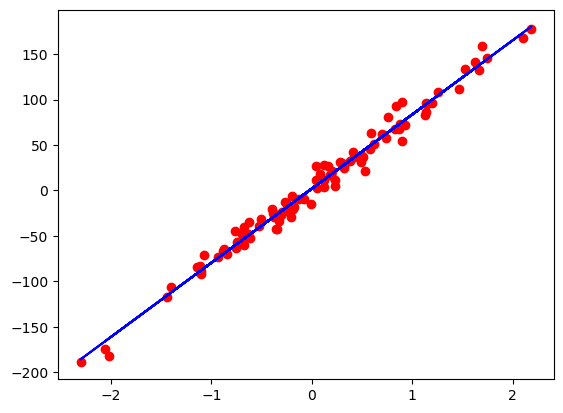

In [21]:
# 0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=10,random_state=1)
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)

n_samples, n_feature= X.shape



#1) model
model=nn.Linear(n_feature,1)


#2) loss and optimizer
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)



#3) training loop
num_epoch=1000

for epoch in range(num_epoch):
    # forward and loss
    y_pred=model(X)
    loss=criterion(y_pred,y)

    # back pass
    loss.backward()


    # update
    optimizer.step()
    


    optimizer.zero_grad()


    if (epoch+1)%10==0:
        print(f'epoch:{epoch+1},loss={loss.item():.4f}')


prediction =model(X).detach().numpy()

plt.plot(X_numpy,y_numpy,"ro")
plt.plot(X_numpy,prediction,"b")
plt.show()


# Logistic regression

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) prepare data
bc=datasets.load_breast_cancer()
X,y=bc.data,bc.target

n_samples,n_features=X.shape

X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

#scale 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))
y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)


1 torch.Size([114, 30])
torch.Size([114, 1])


In [45]:
# 1)model
class logisticregression(nn.Module):
    def __init__(self,n_input_features) -> None:
        super(logisticregression,self).__init__()
        self.linear=nn.Linear(n_input_features,1)
    
    def forward(self,x):
        y_pred=torch.sigmoid(self.linear(x))
        return y_pred
model=logisticregression(n_features)

# 2)loss optimizer
criterion=nn.BCELoss()
optimizer=torch.optim.Rprop(model.parameters(),lr=0.01)
# 3)
num_epochs=100
for epoch in range(num_epoch):
    # forward pass and loss
    y_pred=model(X_train)
    loss=criterion(y_pred,y_train)
    # bcakward  
    loss.backward()

    # update 
    optimizer.step()
    optimizer.zero_grad()

    print(f'epoch {epoch}, loss: {loss.item():.2f}')


# evaluate use testset

with torch.no_grad():
    y_pred=model(X_test)
    y_pred_cls=y_pred.round()
    # .eq() function to compare
    acc = y_pred_cls.eq(y_test).sum()/y_test.shape[0]
    print(f'accuarcy= {acc:.4f}')





epoch 0, loss: 0.70
epoch 1, loss: 0.64
epoch 2, loss: 0.57
epoch 3, loss: 0.51
epoch 4, loss: 0.44
epoch 5, loss: 0.38
epoch 6, loss: 0.32
epoch 7, loss: 0.26
epoch 8, loss: 0.22
epoch 9, loss: 0.17
epoch 10, loss: 0.14
epoch 11, loss: 0.11
epoch 12, loss: 0.08
epoch 13, loss: 0.07
epoch 14, loss: 0.06
epoch 15, loss: 0.05
epoch 16, loss: 0.04
epoch 17, loss: 0.04
epoch 18, loss: 0.03
epoch 19, loss: 0.03
epoch 20, loss: 0.03
epoch 21, loss: 0.03
epoch 22, loss: 0.03
epoch 23, loss: 0.02
epoch 24, loss: 0.02
epoch 25, loss: 0.02
epoch 26, loss: 0.02
epoch 27, loss: 0.02
epoch 28, loss: 0.02
epoch 29, loss: 0.02
epoch 30, loss: 0.02
epoch 31, loss: 0.02
epoch 32, loss: 0.02
epoch 33, loss: 0.02
epoch 34, loss: 0.02
epoch 35, loss: 0.02
epoch 36, loss: 0.02
epoch 37, loss: 0.02
epoch 38, loss: 0.01
epoch 39, loss: 0.01
epoch 40, loss: 0.01
epoch 41, loss: 0.01
epoch 42, loss: 0.01
epoch 43, loss: 0.01
epoch 44, loss: 0.01
epoch 45, loss: 0.01
epoch 46, loss: 0.01
epoch 47, loss: 0.01
ep